# Projeto Bônus

A partir da adoção de um sistema de bandejas, será formulado um modelo cálculo para meta de recomendações semanais convertidas em vendas por uma equipe de baristas.

## Importando arquivos

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import datetime as dt

In [3]:
!pip install openpyxl


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install isoweek


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df = pd.read_excel('Controle de bandejas.xlsx')
df

c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
0,2022,27,33.92,310,1185,8.862233,7.106237,396.368520,93,20.310909,...,0.261269,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010
1,2022,28,33.92,310,1184,8.872677,7.412368,986.444517,38,44.180579,...,0.261577,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888
2,2022,29,33.92,310,1189,8.836661,9.201605,857.375154,81,14.145614,...,0.260515,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776
3,2022,30,33.92,310,1220,8.611724,8.835778,881.167437,90,33.442780,...,0.253883,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450
4,2022,31,33.92,310,1205,8.719288,9.886277,1013.036839,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2023,40,48.89,287,1259,11.126583,13.777216,941.663551,31,12.762229,...,0.227584,0.265761,0.043696,0.663804,0.145576,0.083194,0.016526,0.047205,0.013739,1.013739
67,2023,41,48.89,287,1238,11.310969,13.380321,889.529197,48,26.699747,...,0.231355,-0.055364,0.042981,0.667705,0.147047,0.076680,0.024835,0.040752,0.030944,1.030944
68,2023,42,48.89,287,1248,11.221235,13.777216,872.209222,31,2.495269,...,0.229520,-0.019471,0.034807,0.682038,0.135985,0.081806,0.020793,0.044571,0.002869,1.002869
69,2023,43,48.89,287,1241,11.285606,15.632974,812.750433,45,25.299411,...,0.230837,-0.068170,0.045392,0.669551,0.121681,0.090480,0.024116,0.048780,0.032128,1.032128


## Análise Univariada

Não foi necessária análise de nulos, pois o dataframe foi construído sem nulos por este que vos fala.

In [6]:
df['vendas realizadas (bandejas)'] = df['vendas realizadas (bandejas)'].astype('int')
df

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
0,2022,27,33.92,310,1185,8.862233,7.106237,396,93,20.310909,...,0.261269,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010
1,2022,28,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,0.261577,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888
2,2022,29,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,0.260515,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776
3,2022,30,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.253883,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450
4,2022,31,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2023,40,48.89,287,1259,11.126583,13.777216,941,31,12.762229,...,0.227584,0.265761,0.043696,0.663804,0.145576,0.083194,0.016526,0.047205,0.013739,1.013739
67,2023,41,48.89,287,1238,11.310969,13.380321,889,48,26.699747,...,0.231355,-0.055364,0.042981,0.667705,0.147047,0.076680,0.024835,0.040752,0.030944,1.030944
68,2023,42,48.89,287,1248,11.221235,13.777216,872,31,2.495269,...,0.229520,-0.019471,0.034807,0.682038,0.135985,0.081806,0.020793,0.044571,0.002869,1.002869
69,2023,43,48.89,287,1241,11.285606,15.632974,812,45,25.299411,...,0.230837,-0.068170,0.045392,0.669551,0.121681,0.090480,0.024116,0.048780,0.032128,1.032128


In [7]:
df.describe()

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,...,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,2022.619718,29.154930,43.610141,248.070423,1054.507042,10.219301,12.793882,919.535211,51.352113,27.773773,...,0.235293,0.028009,0.023551,0.681674,0.106129,0.116887,0.028289,0.043470,0.032289,1.032289
std,0.488911,14.069874,3.751123,24.481085,83.626187,0.688304,2.288351,168.134795,23.205356,20.335186,...,0.016763,0.214274,0.008329,0.054961,0.055100,0.022004,0.011476,0.006108,0.024088,0.024088
min,2022.000000,1.000000,33.920000,215.000000,843.000000,8.611724,0.000000,396.000000,0.000000,0.000000,...,0.212955,-0.229839,0.000000,0.606496,0.000000,0.026484,0.013291,0.029500,0.000000,1.000000
25%,2022.000000,18.500000,41.340000,232.000000,1011.000000,9.870156,12.295391,811.500000,33.000000,13.839181,...,0.222152,-0.071213,0.018848,0.639726,0.042955,0.105304,0.020745,0.039644,0.014865,1.014865
50%,2023.000000,31.000000,45.300000,232.000000,1047.000000,10.163086,13.380321,932.000000,48.000000,23.863042,...,0.230783,-0.000106,0.022437,0.662387,0.124516,0.120552,0.024890,0.043386,0.024139,1.024139
75%,2023.000000,40.000000,45.350000,259.000000,1075.500000,10.465729,13.871483,1030.000000,69.000000,39.281478,...,0.247666,0.079454,0.026831,0.737716,0.147023,0.129671,0.033748,0.047538,0.043380,1.043380
max,2023.000000,53.000000,48.890000,310.000000,1260.000000,12.459713,15.632974,1306.000000,119.000000,92.065858,...,0.301396,1.488706,0.052488,0.806860,0.180491,0.182273,0.077360,0.056307,0.118857,1.118857


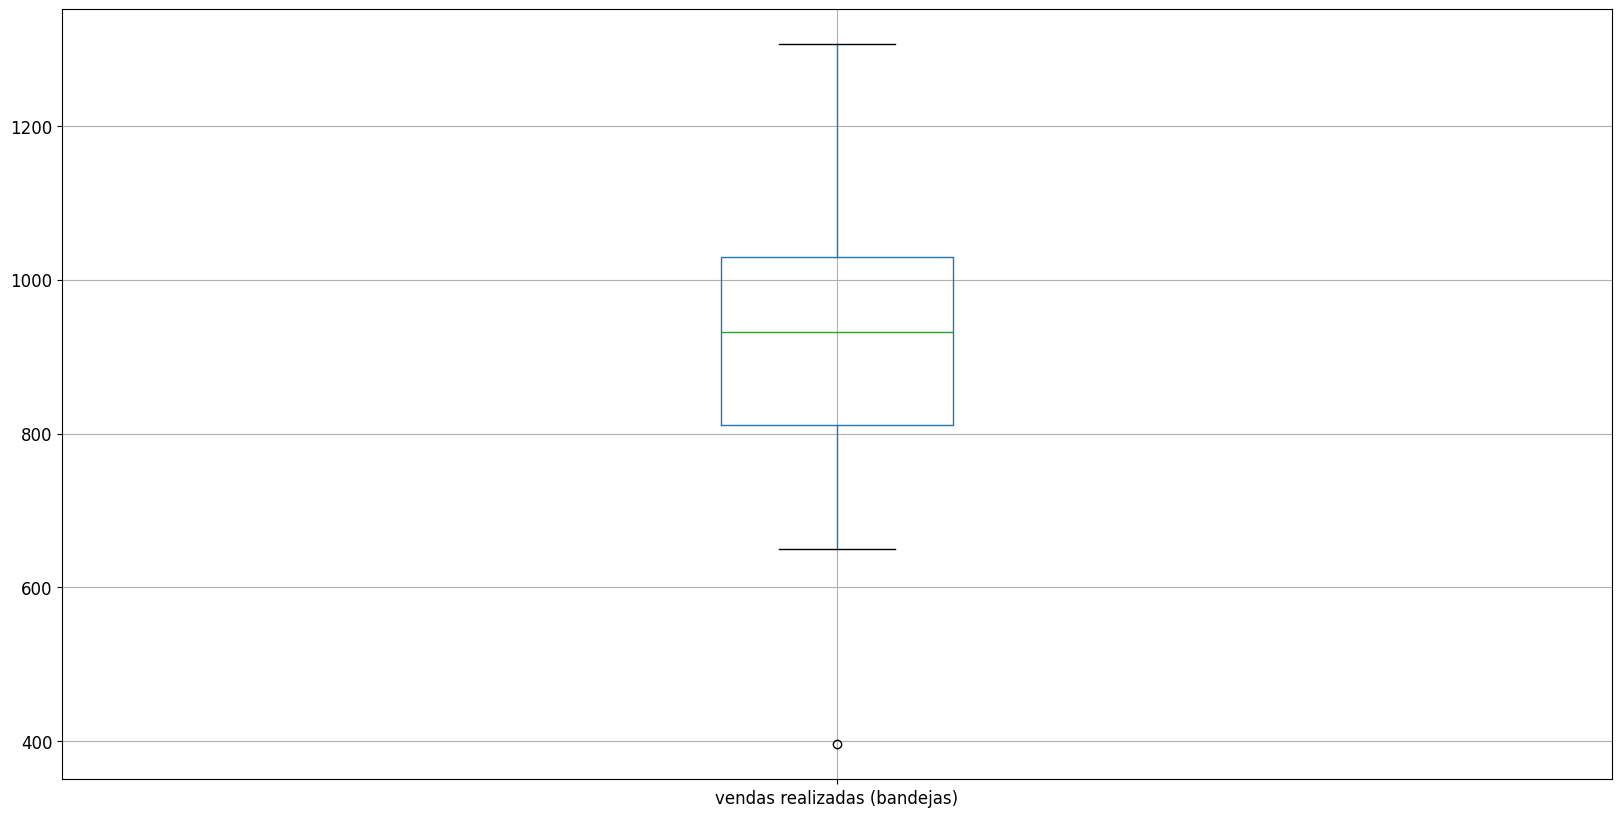

In [26]:
df.boxplot('vendas realizadas (bandejas)',figsize= (20,10), fontsize='large');

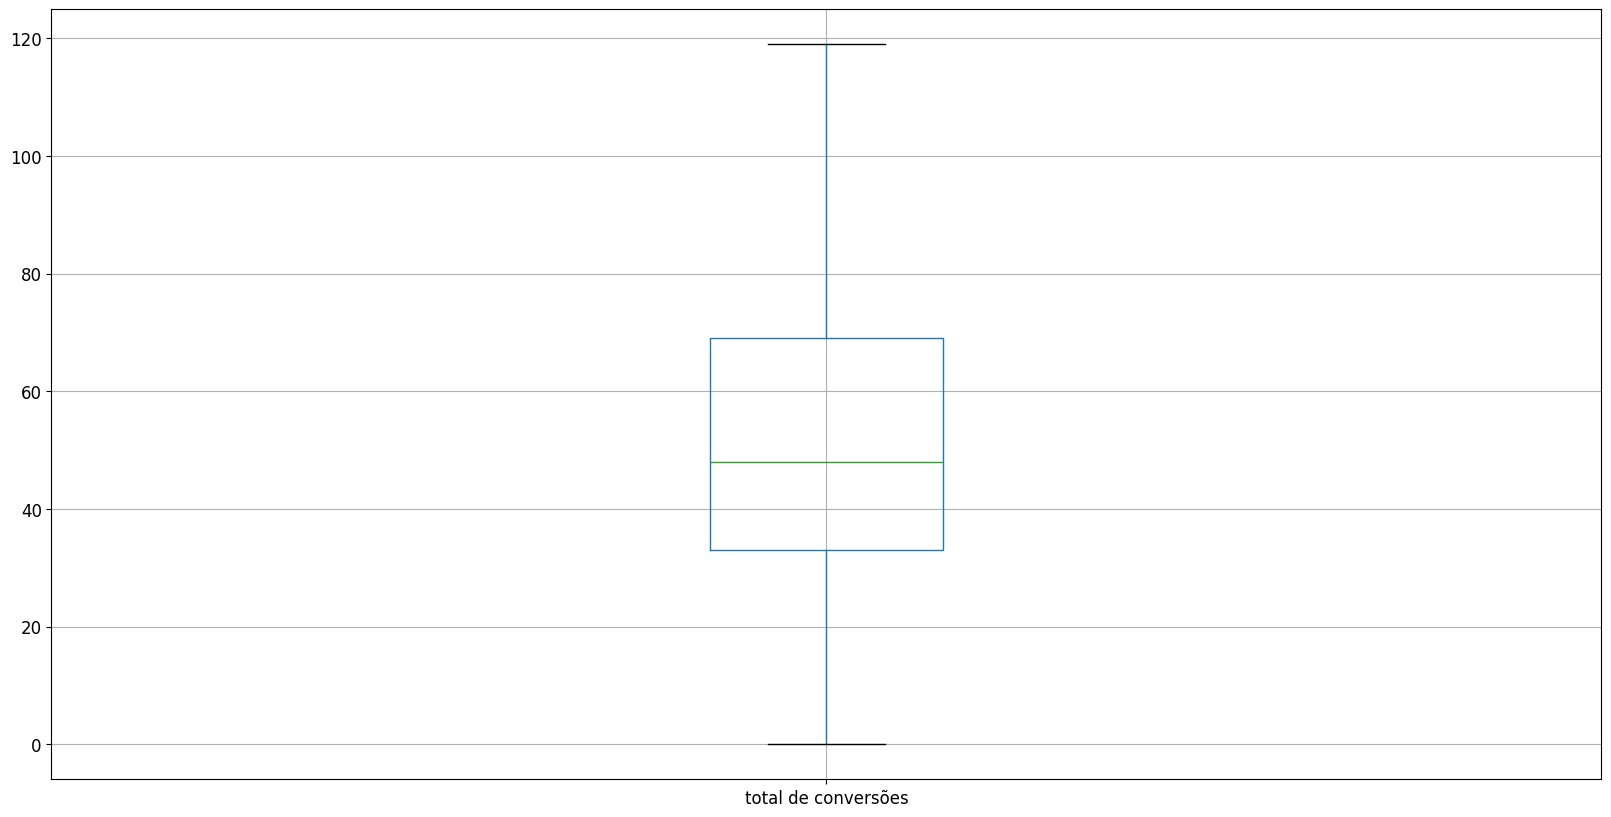

In [27]:
df.boxplot('total de conversões',figsize= (20,10), fontsize='large');

### Criando marcação de data

Formato isocalendar: (YYYY,WW,D), onde o primeiro dia da semana é segunda, e o último é domingo. Como no BI a semana começa na segunda e termina no domingo, os dados de cada semana ficam acumulados para o domingo (i.e. weekday = 7).

É preciso criar uma coluna de data, formando a tupla isocalendar com a coluna ano, combinada com a coluna semana, combinada com o número 7 e aplicando a função date.fromisocalendar(year, week, day).

Primeiro será criada a coluna isoformat, depois a coluna data.

In [9]:
def create_date_from_year_week(year, week):
    """ creates timestamp object from year and week numbers, standardized day is Sunday"""
    return pd.Timestamp.fromisocalendar(year, week, 7)

In [10]:
create_date_from_year_week(2022, 32)

Timestamp('2022-08-14 00:00:00')

### Substituindo semana 53

In [11]:
mask_week_53 = df['Semana'] == 53
df[mask_week_53]

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
26,2022,53,40.58,259,1096,9.583079,12.647708,996,48,22.346681,...,0.236153,-0.045917,0.020279,0.614996,0.180491,0.10831,0.036522,0.039403,0.022929,1.022929


In [12]:
create_date_from_year_week(2022, 0)

ValueError: Invalid week: 0

In [ ]:
year = df['Ano']
week = df['Semana']
date_year_week = lambda x,y: create_date_from_year_week(x,y)
date = list(map(date_year_week, year, week))
date
#df['date']= pd.Series(date)
#df

ValueError: Invalid week: 53

In [ ]:
import datetime as dt
df['data'] = df['isoformat'].apply(lambda x: pd.Timestamp.fromisocalendar(x))
df

TypeError: 'tuple' object cannot be interpreted as an integer